<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_0_Python_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

#####In this part of the assignment, you will work with file I/O operations, dictionaries, Numpy arrays and visualization with Matplotlib. You will write a simple Python script that will read a file named test.txt. You can hard code this into your program for convenience. A sample file is given on Canvas for your reference. Your program should read a text file and print a histogram of the letters present in the document. The code must have the histogram as both a dictionary, where the keys are letters and the values are the corresponding frequencies, as well as a Numpy array, where each index corresponds to a letter in alphabetical order. For example, the letter ‘a’ corresponds to index 0, ‘b’ to index 1, etc. <br>
#####An example of a histogram for a line is given below: <br>
#####Input: The quick brown fox jumps over the lazy dog <br>
#####Output: {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 3, 'f': 1, 'g': 1, 'h': 2, 'i': 1, 'j': 1, 'k': 1, 'l': 1, 'm': 1, 'n': 1, 'o': 4, 'p': 1, 'q': 1, 'r': 2, 's': 1, 't': 2, 'u': 2, 'v': 1, 'w': 1, 'x': 1, 'y': 1, 'z': 1} <br>
#####Given the computed histogram, create two bar graphs. In the first, the frequencies should be normalized i.e., the frequencies will sum to 1. In the second, they should be unnormalized. Make sure to generate titles appropriately for the graph and the axes. Display the plots to the user along with printing the histogram(s). <br>


**Solution 1**

**Libraries**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import collections
from sklearn import preprocessing

**Reading .txt file**

In [39]:
with open("test.txt") as file:
    lines = file.readlines()
    print(lines)

['The quick brown fox jumps over a lazy dog\n', 'Waltz, bad nymph, for quick jigs vex\n', 'Glib jocks quiz nymph to vex dwarf\n', 'Sphinx of black quartz, judge my vow\n', 'How vexingly quick daft zebras jump\n', 'The five boxing wizards jump quickly\n', 'Jackdaws love my big sphinx of quartz\n', 'Pack my box with five dozen liquor jugs\n', 'Waltz, bad nymph, for quick jigs vex\n', 'Quick zephyrs blow, vexing daft Jim\n', 'Sphinx of black quartz, judge my vow\n', 'Two driven jocks help fax my big quiz\n', 'Five quacking zephyrs jolt my wax bed\n', 'The five boxing wizards jump quickly\n', 'Pack my box with five dozen liquor jugs\n', 'The quick brown fox jumps over the lazy dog\n', 'Jinxed wizards pluck ivy from the big quilt\n', 'Crazy Fredrick bought many very exquisite opal jewels\n', 'We promptly judged antique ivory buckles for the next prize\n', 'A mad boxer shot a quick, gloved jab to the jaw of his dizzy opponent\n', 'Jaded zombies acted quaintly but kept driving their oxen forw

**Alphabetical order**

In [40]:
letter_list = list(string.ascii_lowercase)
print(letter_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**Counting letters**

In [41]:
letter = []
letter_index = {}
for j in range(len(lines)):
    letter_index = {}
    for i in range(len(letter_list)):
        letter_index[letter_list[i]] = len(re.findall(letter_list[i], lines[j].lower()))
    letter.append(letter_index)
key = collections.Counter()
for k in letter: 
    key.update(k)     
frequency = dict(key)
print("Output:", frequency)

Output: {'a': 44, 'b': 24, 'c': 23, 'd': 30, 'e': 63, 'f': 22, 'g': 23, 'h': 25, 'i': 56, 'j': 23, 'k': 22, 'l': 26, 'm': 22, 'n': 28, 'o': 50, 'p': 25, 'q': 22, 'r': 40, 's': 25, 't': 36, 'u': 38, 'v': 22, 'w': 22, 'x': 22, 'y': 27, 'z': 23}


**Normalized histogram**

Sum of frequencies: 783
Normalized: [0.0561941251596424, 0.03065134099616858, 0.02937420178799489, 0.038314176245210725, 0.08045977011494253, 0.0280970625798212, 0.02937420178799489, 0.031928480204342274, 0.07151979565772669, 0.02937420178799489, 0.0280970625798212, 0.033205619412515965, 0.0280970625798212, 0.035759897828863345, 0.06385696040868455, 0.031928480204342274, 0.0280970625798212, 0.05108556832694764, 0.031928480204342274, 0.04597701149425287, 0.04853128991060025, 0.0280970625798212, 0.0280970625798212, 0.0280970625798212, 0.034482758620689655, 0.02937420178799489]
Normalized sum of frequencies: 1.0


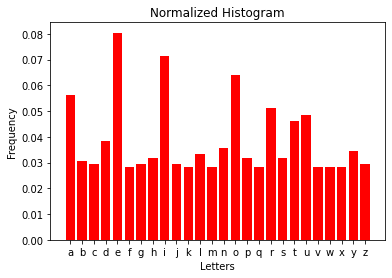

In [42]:
values = list(frequency.values())
x = sum(values)
print("Sum of frequencies:", x)
norm = [y / x for y in values]
print("Normalized:", norm)
z = round(sum(norm),2)
print("Normalized sum of frequencies:", z)
bins = range(len(frequency))
labels = list(frequency.keys())
plt.bar(bins, norm, width=0.8, color='red', tick_label=labels)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Normalized Histogram')
plt.show()

**Unnormalized histogram**

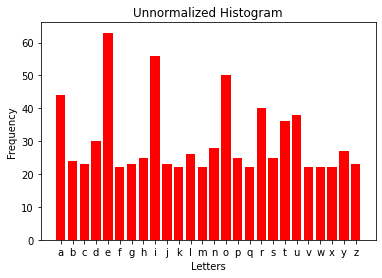

In [43]:
plt.bar(bins, values, width=0.8, color='red', tick_label=labels)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Unnormalized Histogram')
plt.show()

**Problem 2**

#####In this part of the assignment, you will be working with arrays using NumPy. You will be working with an image (test.png) that was provided on Canvas for convenience. You can read the image using OpenCV (installed by default on Colab) as follows. <br>
#####import cv2 <br>
#####img = cv2.imread(‘input.png’) <br>
#####Perform the following operations: <br>
1. For each pixel in the image, i.e., every element in the array img,compute the Euclidean distance to the following points [255, 0, 0], [0, 255, 0] and [0, 0, 255]. Once computed, set the value of the pixel to the point with the least distance. Save the image as output1.png <br>
2. Set the pixels that fall within a square (whose sides are of length 50) at the center of the image to be [0,0,0]. Save the image as output2.png <br>

**Solution 2**

**Libraries**

In [44]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pylab as plt

**Read image and pixel details**

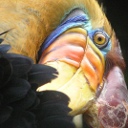

Data type: uint8
Height of image: 128
Width of image: 128
Number of channels of the image: 3
Pixels: [[[103 180 219]
  [116 185 230]
  [110 186 226]
  ...
  [ 13  15  14]
  [ 12  15  13]
  [ 12  14  12]]

 [[119 193 230]
  [120 192 224]
  [124 192 226]
  ...
  [ 13  16  16]
  [ 10  15  14]
  [  9  14  11]]

 [[123 191 228]
  [121 191 228]
  [118 185 220]
  ...
  [ 13  16  14]
  [ 11  13  13]
  [ 10  15  11]]

 ...

 [[ 16  18  15]
  [ 18  21  18]
  [ 16  19  18]
  ...
  [ 45  45  81]
  [ 35  43  70]
  [ 43  51  72]]

 [[ 17  17  16]
  [ 19  18  17]
  [ 20  19  20]
  ...
  [ 40  38  80]
  [ 40  39  68]
  [ 42  43  59]]

 [[ 19  19  15]
  [ 18  20  20]
  [ 17  19  18]
  ...
  [ 39  43  65]
  [ 38  37  58]
  [ 34  39  52]]]


In [45]:
img = cv2.imread('/content/test.png')
cv2_imshow(img)
# Check the image matrix data type (could know the bit depth of the image)
print("Data type:", img.dtype)
# Check the height of image 
print("Height of image:",img.shape[0])
# Check the width of image 
print("Width of image:",img.shape[1])
# Check the number of channels of the image
print("Number of channels of the image:",img.shape[2])
print("Pixels:",img)

**Calculate Euclidean distance**

In [46]:
a = [255,0,0]
b = [0,255,0]
c = [0,0,255]
new_img_1 = np.copy(img)
# Euclidean distance
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    new_a = np.linalg.norm(img[i,j,:] - a)
    new_b = np.linalg.norm(img[i,j,:] - b)
    new_c = np.linalg.norm(img[i,j,:] - c)
# Find least distance        
    least_dist = np.argmin([new_a,new_b,new_c])
    # print(least_dist)
    if least_dist == 0:
      new_img_1[i,j,:] = [255,0,0]
    elif least_dist == 1:
      new_img_1[i,j,:] = [0,255,0]
    elif least_dist == 2:
      new_img_1[i,j,:] = [0,0,255]

**Output1.png**

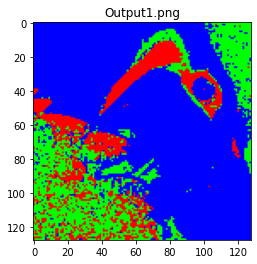

In [47]:
plt.imshow(new_img_1)
plt.title("Output1.png")
plt.savefig("Output1.png")
plt.show()

**Set a square in the image**

In [49]:
# Find the center of the image and add a square of length 50 (25 left and 25 right)
new_img_2 = np.copy(img)
new_img_3 = np.copy(new_img_1)
for i in range(int((img.shape[0]/2)-25), int((img.shape[0]/2)+25)):
  for j in range(int((img.shape[1]/2)-25), int((img.shape[1]/2)+25)):
    new_img_2[i,j,:] = [0,0,0]
    new_img_3[i,j,:] = [0,0,0]

**Output2.png**

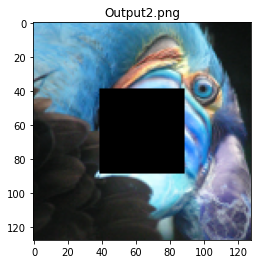

In [50]:
plt.imshow(new_img_2)
plt.title("Output2.png")
plt.savefig("Output2.png")
plt.show()

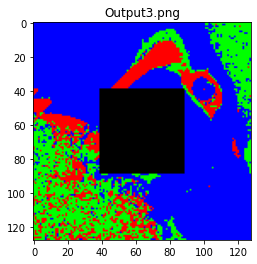

In [51]:
plt.imshow(new_img_3)
plt.title("Output3.png")
plt.savefig("Output3.png")
plt.show()

**Problem 3**

#####In this part of the assignment, you will be using NumPy to solve the following word problem. Specifically, you can use the LinAlg package from Numpy to solve the system of equations. <br>
#####Problem statement: <br>
#####You and a friend go to buy tacos. You get three soft tacos and three burritos and your total bill is 11.25 dollar. Your friend's bill is 10.00 dollar for four soft tacos and two burritos. How much do soft tacos cost? How much do burritos cost? <br>

**Solution 3**

#####Let assume, <br>
#####<dd>The cost of one soft taco = $x$ <br>
#####<dd>and the cost of one burrito = $y$ </dd> <br>
#####So, we have this system of equations: <br>
#####<dd>$3x+3y=11.25$ <br>
#####<dd>$4x+2y=10$ </dd> <br>
#####Now, we can arrange these equations by Inverse of a Matrix formulation to solve the unknow (x and y). <br>


**Libraries**

In [52]:
import numpy as np

**Array from the system of equations**

In [53]:
Coeff = [[3, 3], [4, 2]]        # 3x+3y=11.25 and 4x+2y=10
A = np.array(Coeff)
B = np.array([11.25, 10])

**Validation**

In [54]:
print(np.linalg.det(A))

-6.0


**Inverse of a Matrix formulation**

In [55]:
inv_A = np.linalg.inv(A)        # A*X=B
X = np.linalg.inv(A).dot(B)     # X=inv(A)*B

**Final Answers**

In [56]:
print(X)
print("Each soft tacos costs: $",round(X[0],2))
print("Each burritos costs: $",round(X[1],2))

[1.25 2.5 ]
Each soft tacos costs: $ 1.25
Each burritos costs: $ 2.5
